## Install `gapminder` package

```sh

# from a terminal

mamba install -c conda-forge r-gapminder
```

## Load libraries

In [1]:
library('tidyverse')
library('gganimate')
library('palmerpenguins')
#library('gapminder')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Function for displaying `GIFs`

In [2]:
display_gif <- function(gganim, ...){
    
    raw = suppressMessages(animate(gganim, ...))
    
    contents <- base64enc::base64encode(raw)
    tag <- '<img src="data:image/gif;base64,%s">'
    
    IRdisplay::display_html(sprintf(tag, contents))
    
}

## Iris example


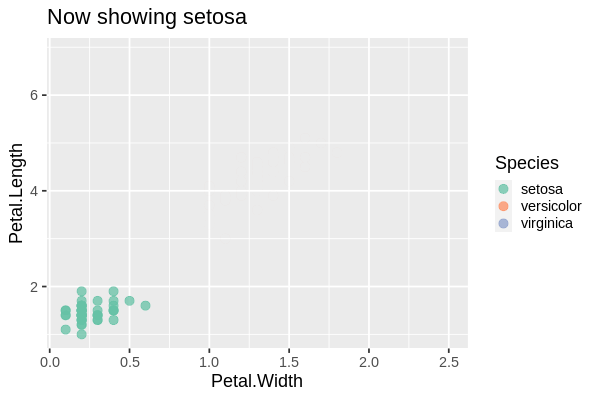

In [3]:
theme_set(theme_gray(base_size = 18))

anim = ggplot(iris, aes(x = Petal.Width, y = Petal.Length, colour = Species)) + 
    geom_point(size = 4, alpha = 0.75) +
    scale_color_brewer(palette = 'Set2') +
    ggtitle('Now showing {closest_state}') +
    transition_states(Species,
                      transition_length = 2,
                      state_length = 1) + 
    enter_fade() + 
    exit_shrink()

display_gif(anim, w = 600, h = 400)

## Tweening

In [4]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [5]:
penguins2 = penguins |> 
    mutate(penguin_id = row_number()) |>
    pivot_longer(cols = c(bill_length_mm, bill_depth_mm)) |>
    filter(species == 'Adelie') |>
    select(species, name, value, penguin_id)

penguins2 |> head()

species,name,value,penguin_id
<fct>,<chr>,<dbl>,<int>
Adelie,bill_length_mm,39.1,1
Adelie,bill_depth_mm,18.7,1
Adelie,bill_length_mm,39.5,2
Adelie,bill_depth_mm,17.4,2
Adelie,bill_length_mm,40.3,3
Adelie,bill_depth_mm,18.0,3


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”


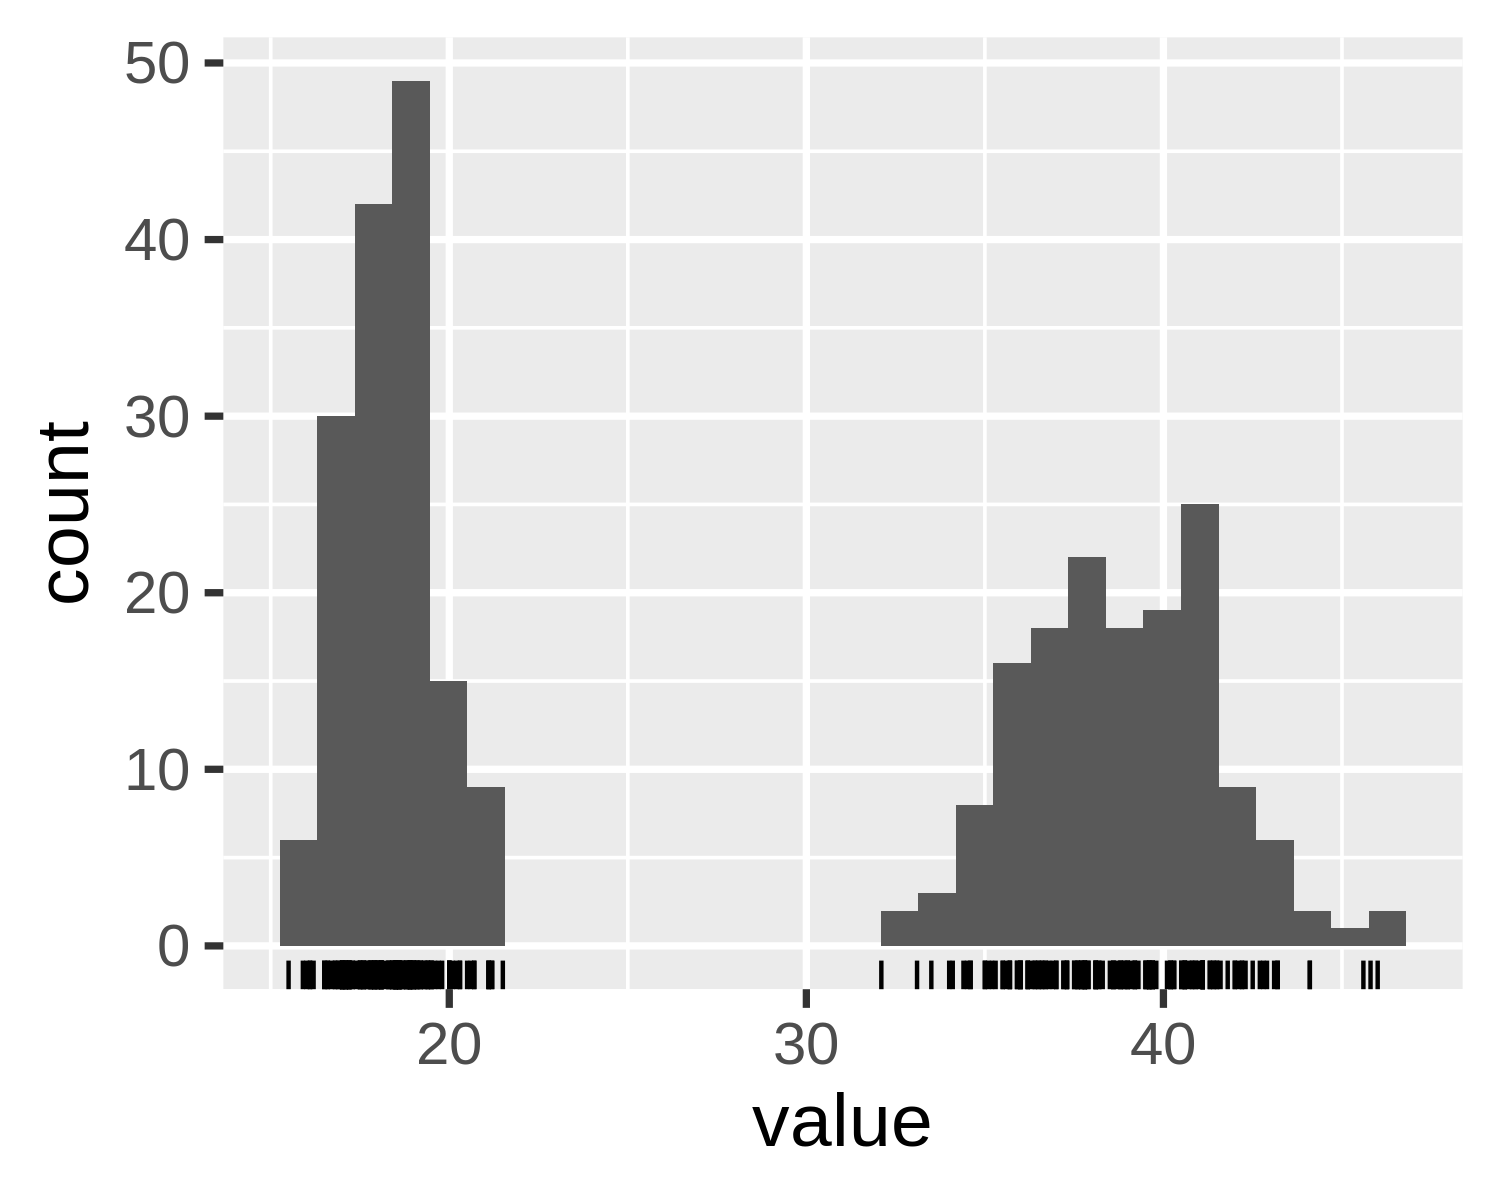

In [6]:
p = ggplot(penguins2, aes(x = value)) + 
    geom_histogram() + 
    geom_rug()

p

Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”



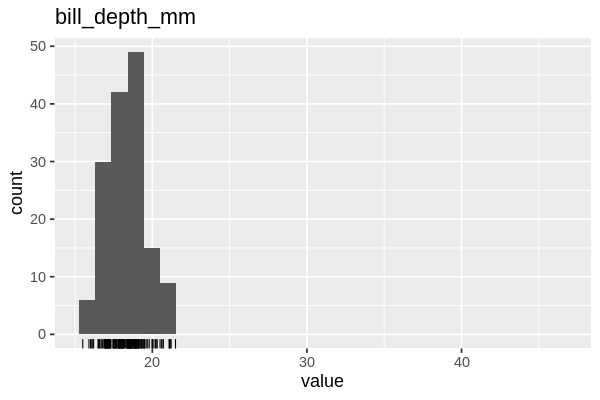

In [7]:
anim = ggplot(penguins2, aes(x = value, group = penguin_id)) + 
    geom_histogram() + 
    geom_rug() +
    transition_states(name) +
    ggtitle('{closest_state}')

display_gif(anim, w = 600, h = 400)

### What about body mass versus bill depth/bill length?

In [8]:
penguins3 = penguins |> 
    mutate(penguin_id = row_number()) |>
    pivot_longer(cols = c(bill_length_mm, bill_depth_mm)) 

penguins3 |> head()

species,island,flipper_length_mm,body_mass_g,sex,year,penguin_id,name,value
<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<chr>,<dbl>
Adelie,Torgersen,181,3750,male,2007,1,bill_length_mm,39.1
Adelie,Torgersen,181,3750,male,2007,1,bill_depth_mm,18.7
Adelie,Torgersen,186,3800,female,2007,2,bill_length_mm,39.5
Adelie,Torgersen,186,3800,female,2007,2,bill_depth_mm,17.4
Adelie,Torgersen,195,3250,female,2007,3,bill_length_mm,40.3
Adelie,Torgersen,195,3250,female,2007,3,bill_depth_mm,18.0


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geo


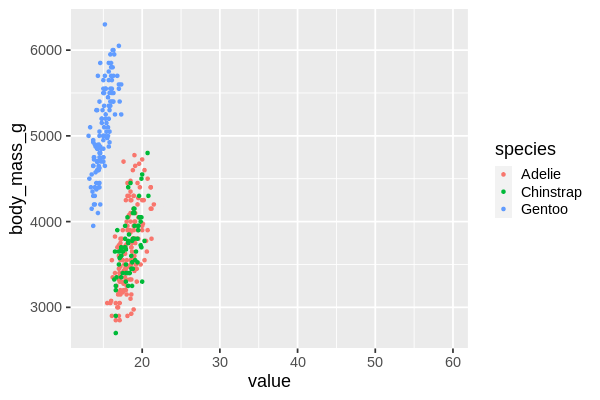

In [9]:
anim = ggplot(penguins3, aes(x = value, y = body_mass_g, color = species, group = penguin_id)) + 
    geom_point() +
    transition_states(name)

display_gif(anim, w = 600, h = 400)

## Bar chart race

Adapted from excellent example here: [https://evamaerey.github.io/little_flipbooks_library/racing_bars/racing_barcharts.html](https://evamaerey.github.io/little_flipbooks_library/racing_bars/racing_barcharts.html)

In [10]:
theme_set(theme_void(base_size = 20))

anim = ggplot(ranked_countries,  
              aes(xmin = 0,  
                  xmax = pop / 1000000,
                  ymin = rank - .45,  
                  ymax = rank + .45,
                  y = rank,
                  fill = continent)) +  
    geom_rect(alpha = .7) +  
    geom_text(col = "gray13",  
              hjust = "right",  
              aes(label = country), 
              size = 8,
              x = -50) + 
    geom_text(x = 1000 , y = -10,  
              family = "Monospace",  
              aes(label = as.character(year)),  
              size = 26, col = "grey40") +
    scale_fill_brewer(palette = "Dark2") +   
    scale_y_reverse() +  
    scale_x_continuous(limits = c(-600, 1400), breaks = c(0, 400, 800, 1200)) +  
    labs(x = 'Population (millions)', y = '', fill = NULL) +  
    theme_void() +
    theme(legend.text = element_text(size = 16), legend.key.size = unit(0.5, "in") ) +
    transition_time(year) + enter_fade() + exit_fade() # this is it!
    
display_gif(anim, h = 700, w = 750, duration = 30, nframes = 300)

ERROR: Error in ggplot(ranked_countries, aes(xmin = 0, xmax = pop/1e+06, ymin = rank - : object 'ranked_countries' not found


### Make a bar chart for one year with `geom_col`

In [ ]:
ranked_countries |> head()

### Make a bar chart for one year with `geom_rect`